# **StockistAI**

### Importing the necessary modules

In [ ]:
#Essential modules 

import pandas as pd
import numpy as np

#Visualisation libraries 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import graphviz
from sklearn.tree import export_graphviz

#Encoding 
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce


#Normalization

from sklearn.preprocessing import MinMaxScaler
from scipy import stats

#Model Building

from sklearn import model_selection
from sklearn.model_selection import train_test_split,StratifiedKFold

##Classifiers 

#Decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Boosting 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier

#Bagging 
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification #for bootstrapping

#KFold 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

#Evaluation libraries 
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

# surpress warnings
import warnings
warnings.filterwarnings('ignore')

# Timer
import timeit

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importing the data

In [ ]:
stock_data = pd.read_excel('stock_2021_rec.csv.xlsx')

In [ ]:
stock_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2021-01-01 00:00:00,ADANIPORTS,EQ,483.75,485,508,482.55,505,503.85,495.57,7815730,387000000000000,79171,834159,0.1067
1,2021-01-01 00:00:00,ADANIPORTS,EQ,483.75,485,508,482.55,505,503.85,495.57,7815730,387000000000000,79171,834159,0.1067
2,2021-01-04 00:00:00,ADANIPORTS,EQ,503.85,507,510.9,495.2,498.1,498.9,501.35,9998803,501000000000000,88263,1356432,0.1357
3,2021-01-04 00:00:00,ADANIPORTS,EQ,503.85,507,510.9,495.2,498.1,498.9,501.35,9998803,501000000000000,88263,1356432,0.1357
4,2021-01-05 00:00:00,ADANIPORTS,EQ,498.9,498.9,504.5,492,498.75,499.45,499.14,5135408,256000000000000,57609,673387,0.1311


### Helper method to find the columns with missing values

In [ ]:
def printColumnTypes(df):
    non_num_df = df.select_dtypes(include=['object'])
    num_df = df.select_dtypes(exclude=['object'])
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_num_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in num_df:
        print(f"{col}")

def missing_cols(df):
    '''prints out columns with its amount of missing values with its %'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        pct = df[col].isna().mean() * 100
        total += missing_vals
        if missing_vals != 0:
          print('{} => {} [{}%]'.format(col, df[col].isnull().sum(), round(pct, 2)))
    
    if total == 0:
        print("no missing values")

In [ ]:
missing_cols(stock_data)

no missing values


In [ ]:
printColumnTypes(stock_data)

Non-Numeric columns:
Date
Symbol
Series
Prev Close
Open
High
Low
Last
Close
VWAP
Volume
Turnover
Trades
Deliverable Volume
%Deliverble

Numeric columns:


In [ ]:
print('Dimension of dataframe is', stock_data.shape)

Dimension of dataframe is (7860, 15)


In [ ]:
## method 1

stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                7860 non-null   object
 1   Symbol              7860 non-null   object
 2   Series              7860 non-null   object
 3   Prev Close          7860 non-null   object
 4   Open                7860 non-null   object
 5   High                7860 non-null   object
 6   Low                 7860 non-null   object
 7   Last                7860 non-null   object
 8   Close               7860 non-null   object
 9   VWAP                7860 non-null   object
 10  Volume              7860 non-null   object
 11  Turnover            7860 non-null   object
 12  Trades              7860 non-null   object
 13  Deliverable Volume  7860 non-null   object
 14  %Deliverble         7860 non-null   object
dtypes: object(15)
memory usage: 921.2+ KB


In [ ]:
## Method 2

printColumnTypes(stock_data)

Non-Numeric columns:
Date
Symbol
Series
Prev Close
Open
High
Low
Last
Close
VWAP
Volume
Turnover
Trades
Deliverable Volume
%Deliverble

Numeric columns:


In [ ]:
stock_data.nunique()

Date                    81
Symbol                  50
Series                   2
Prev Close            3703
Open                  3306
High                  3581
Low                   3583
Last                  3582
Close                 3705
VWAP                  3883
Volume                3921
Turnover              1092
Trades                3895
Deliverable Volume    3921
%Deliverble           2715
dtype: int64

In [ ]:
stock_data['Low'].value_counts()

97         10
1510        8
98          8
214         8
132.3       7
           ..
2737.45     2
2735.6      2
2838        2
186         2
Low         1
Name: Low, Length: 3583, dtype: int64

In [ ]:
## Method 1

stock_data.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [ ]:
## Method 2 

missing_cols(stock_data)      # Gives percentage of missing values

no missing values


In [ ]:
stock_data.describe()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,7860,7860,7860,7860.00,7860,7860.0,7860,7860,7860.00,7860.00,7860,7860,7860,7860,7860.0000
unique,81,50,2,3703.00,3306,3581.0,3583,3582,3705.00,3883.00,3921,1092,3895,3921,2715.0000
top,2021-04-30 00:00:00,ADANIPORTS,EQ,99.05,405,99.8,97,133,99.05,104.39,6459737,1050000000000000,54574,2004555,0.3296
freq,117,161,7859,12.00,14,8.0,10,9,12.00,6.00,3,38,4,3,12.0000


## Encoding 

In [ ]:
objList = stock_data.select_dtypes(include = "object").columns
print (objList)

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


In [ ]:
## Method 1: Label Encoder
#Label Encoding for object to numeric conversion

le = LabelEncoder()

for feat in objList:
    stock_data[feat] = le.fit_transform(stock_data[feat].astype(str))

print (stock_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Date                7860 non-null   int64
 1   Symbol              7860 non-null   int64
 2   Series              7860 non-null   int64
 3   Prev Close          7860 non-null   int64
 4   Open                7860 non-null   int64
 5   High                7860 non-null   int64
 6   Low                 7860 non-null   int64
 7   Last                7860 non-null   int64
 8   Close               7860 non-null   int64
 9   VWAP                7860 non-null   int64
 10  Volume              7860 non-null   int64
 11  Turnover            7860 non-null   int64
 12  Trades              7860 non-null   int64
 13  Deliverable Volume  7860 non-null   int64
 14  %Deliverble         7860 non-null   int64
dtypes: int64(15)
memory usage: 921.2 KB
None


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Date                7860 non-null   int64
 1   Symbol              7860 non-null   int64
 2   Series              7860 non-null   int64
 3   Prev Close          7860 non-null   int64
 4   Open                7860 non-null   int64
 5   High                7860 non-null   int64
 6   Low                 7860 non-null   int64
 7   Last                7860 non-null   int64
 8   Close               7860 non-null   int64
 9   VWAP                7860 non-null   int64
 10  Volume              7860 non-null   int64
 11  Turnover            7860 non-null   int64
 12  Trades              7860 non-null   int64
 13  Deliverable Volume  7860 non-null   int64
 14  %Deliverble         7860 non-null   int64
dtypes: int64(15)
memory usage: 921.2 KB


## Outliers Detection and Removal (Optional)

In [ ]:
## Z-score method is used to detect and remove outliers 

z = np.abs(stats.zscore(stock_data))
print(z)

[[1.71070515 1.6748271  0.01128019 ... 1.27059616 1.46812466 1.66373016]
 [1.71070515 1.6748271  0.01128019 ... 1.27059616 1.46812466 1.66373016]
 [1.66750622 1.6748271  0.01128019 ... 1.4821431  1.31095352 1.5344623 ]
 ...
 [1.65881147 1.72067171 0.01128019 ... 0.84216916 0.21169334 0.34546737]
 [1.7020104  1.72067171 0.01128019 ... 0.88394523 0.12409353 0.33200197]
 [1.7020104  1.72067171 0.01128019 ... 0.88394523 0.12409353 0.33200197]]


In [ ]:
## It gives indices of the rows with z-score greater than 3 i.e. rows with outliers 

threshold = 3
print(np.where(z > 3))

(array([6259]), array([2]))


In [ ]:
clean_stock_data = stock_data[(z < 3).all(axis=1)]
clean_stock_data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,0,0,0,2430,2187,2424,2316,2373,2466,2574,3480,495,3381,3622,85
1,0,0,0,2430,2187,2424,2316,2373,2466,2574,3480,495,3381,3622,85
2,1,0,0,2464,2222,2428,2338,2359,2457,2585,3919,627,3619,477,181
3,1,0,0,2464,2222,2428,2338,2359,2457,2585,3919,627,3619,477,181
4,2,0,0,2455,2206,2416,2332,2360,2460,2578,2692,297,2786,3286,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7855,77,49,0,876,784,904,813,843,886,930,3620,115,2363,1510,1041
7856,78,49,0,882,800,912,804,830,870,920,3837,152,2899,1721,1064
7857,78,49,0,882,800,912,804,830,870,920,3837,152,2899,1721,1064
7858,79,49,0,866,767,905,782,822,862,922,223,222,2946,2101,1074


In [ ]:
clean_stock_data = clean_stock_data.drop(['Series'], axis=1)

In [ ]:
print('Dimension of dataframe after cleaning is', clean_stock_data.shape)

Dimension of dataframe after cleaning is (7859, 14)


## Exploratory Data Analysis After Cleaning and Preprocessing - Visualization 

### Data Description 

In [ ]:
stock_df = clean_stock_data

In [ ]:
stock_df.describe()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,7859.000000,7859.000000,7859.000000,7859.000000,7859.000000,7859.000000,7859.000000,7859.000000,7859.000000,7859.000000,7859.000000,7859.000000,7859.000000,7859.000000
mean,39.595496,24.167324,1846.554269,1650.467617,1777.409212,1783.672223,1776.079908,1846.403614,1939.583026,1959.175086,418.436697,1951.273953,1960.317725,1320.727319
std,23.147180,14.431736,1078.598115,969.714254,1041.156220,1044.168182,1044.471259,1079.505942,1124.618347,1131.771394,295.925454,1124.975549,1131.598326,742.589115
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,20.000000,12.000000,922.500000,818.500000,885.500000,886.500000,880.500000,921.500000,965.500000,979.000000,160.000000,976.000000,981.000000,692.500000
50%,40.000000,24.000000,1847.000000,1651.000000,1768.000000,1779.000000,1761.000000,1845.000000,1940.000000,1959.000000,377.000000,1956.000000,1960.000000,1300.000000
75%,60.000000,36.000000,2781.000000,2499.000000,2684.000000,2686.000000,2682.000000,2782.000000,2915.000000,2940.000000,633.000000,2924.000000,2941.000000,1935.000000
max,79.000000,49.000000,3701.000000,3304.000000,3579.000000,3581.000000,3580.000000,3703.000000,3881.000000,3919.000000,1090.000000,3893.000000,3919.000000,2714.000000


## Class Distribution

In [ ]:
stock_df['High'].value_counts()

3550    8
1068    8
2707    8
1140    8
2542    6
       ..
1420    2
1413    2
1384    2
1380    2
912     2
Name: High, Length: 3580, dtype: int64

In [ ]:
stock_df.nunique()

Date                    80
Symbol                  49
Prev Close            3702
Open                  3305
High                  3580
Low                   3582
Last                  3581
Close                 3704
VWAP                  3882
Volume                3920
Turnover              1091
Trades                3894
Deliverable Volume    3920
%Deliverble           2714
dtype: int64

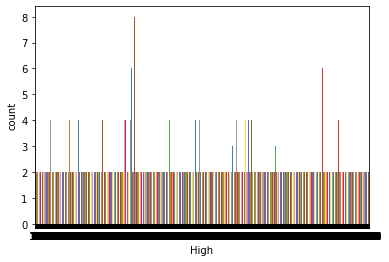

In [ ]:
sns.countplot(x = 'High', data = stock_df, palette="Set1")
plt.show()

## Feature Selection

### Correlation Matrix

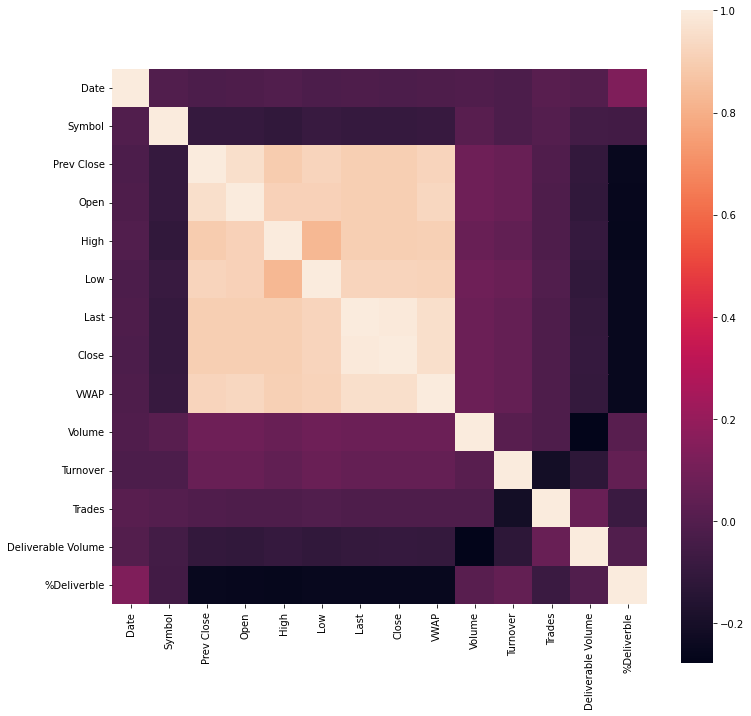

In [ ]:
plt.figure(figsize = (12,12))
corrmat = stock_df.corr()
ax = sns.heatmap(corrmat, vmax=1, square=True);

### Box Plot
#### To identify outliers 

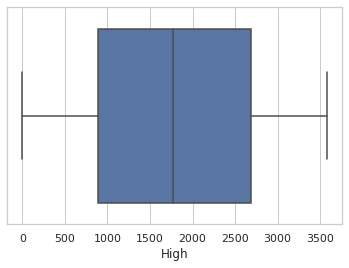

In [ ]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=stock_df["High"])

## Data preparation for Modelling 

In [ ]:
X = stock_df.drop(['High'], axis=1)     

y = stock_df['High']

In [ ]:
X.head()

,Date,Symbol,Prev Close,Open,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,0,0,2430,2187,2316,2373,2466,2574,3480,495,3381,3622,85
1,0,0,2430,2187,2316,2373,2466,2574,3480,495,3381,3622,85
2,1,0,2464,2222,2338,2359,2457,2585,3919,627,3619,477,181
3,1,0,2464,2222,2338,2359,2457,2585,3919,627,3619,477,181
4,2,0,2455,2206,2332,2360,2460,2578,2692,297,2786,3286,166


In [ ]:
y.head()

0    2424
1    2424
2    2428
3    2428
4    2416
Name: High, dtype: int64

### Data Normalization

In [ ]:
column_maxes = X.max()
X_max = column_maxes.max()
column_mins = X.min()
X_min = column_mins.min()
normalized_X = (X - X_min) / (X_max - X_min)

normalized_X.head()

,Date,Symbol,Prev Close,Open,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,0.000000,0.0,0.620056,0.558051,0.590967,0.605512,0.629242,0.656800,0.887982,0.126308,0.862720,0.924215,0.021689
1,0.000000,0.0,0.620056,0.558051,0.590967,0.605512,0.629242,0.656800,0.887982,0.126308,0.862720,0.924215,0.021689
2,0.000255,0.0,0.628732,0.566981,0.596581,0.601939,0.626946,0.659607,1.000000,0.159990,0.923450,0.121715,0.046185
3,0.000255,0.0,0.628732,0.566981,0.596581,0.601939,0.626946,0.659607,1.000000,0.159990,0.923450,0.121715,0.046185
4,0.000510,0.0,0.626435,0.562899,0.595050,0.602194,0.627711,0.657821,0.686910,0.075785,0.710896,0.838479,0.042358


### Train and Test Division

#### test_size = 0.25 means entire dataset is divided into 2 sets - Train data = 75% and Test/Validation data = 25%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
X_train.shape, X_test.shape

((5894, 13), (1965, 13))

## Adaboost Classifier

In [ ]:
clf_adaboost = AdaBoostClassifier(random_state=0)
clf_adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [ ]:
y_pred_adaboost = clf_adaboost.predict(X_test)

In [ ]:
result = pd.crosstab(y_test, y_pred_adaboost, rownames=['Actual Result'], colnames=['Predicted Result'])
print("Confusion Matrix:\n")
print(result)
result1 = classification_report(y_test, y_pred_adaboost)
print("\nClassification Report:\n",)
print (result1)
result2 = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy of the model:",result2)

Confusion Matrix:

Predicted Result  38    2707  2938
Actual Result                     
0                    0     1     0
2                    0     3     0
3                    0     1     0
4                    2     0     0
5                    0     2     0
...                ...   ...   ...
3571                 0     1     0
3574                 0     1     0
3575                 0     1     0
3577                 0     1     0
3579                 0     1     0

[1657 rows x 3 columns]

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00

In [ ]:
# Cross Validation using KFold 

scores = cross_validate(clf_adaboost, X_test, y_test,cv=KFold(n_splits=5))
k=scores['test_score']
print("K fold scores are:", k)
print("Average of k fold scores is:", np.mean(k, axis = None))

K fold scores are: [0.         0.         0.00508906 0.         0.00254453]
Average of k fold scores is: 0.0015267175572519086
